# Exercise Set: Understanding Returns, Bonds, IRR, and Related Concepts

This notebook presents a series of applied exercises that introduce and reinforce key financial concepts commonly used in personal finance, investment analysis, and risk management.

### Overview of Exercises:

1. **Internal Rate of Return (IRR)**  
   Evaluate a capital investment project by computing the IRR and assessing its financial viability.

2. **Yield to Maturity (YTM)**  
   Analyze a bond’s current market value by estimating the yield an investor would earn if held to maturity.

3. **Future Value (FV) of Annuities**  
   Explore the effect of compound interest on long-term savings through consistent yearly contributions.

4. **Retirement Planning with Monthly Contributions**  
   Determine how much one must save monthly to fund retirement withdrawals and leave a legacy.

5. **Amortizing Mortgage Loans**  
   Understand the structure of a mortgage, calculate effective interest rates, and visualize amortization schedules.

6. **Bond Valuation under Market Conditions**  
   Price a fixed-income security based on current interest rates and compare yields across similar instruments.

7. **Stock Returns and Value at Risk (VaR)**  
   Estimate portfolio risk using multiple VaR methods and analyze the distribution of stock returns.

8. **Central Limit Theorem (CLT) in Practice**  
   Demonstrate how sampling distributions of returns approach normality as sample size increases.

---

These problems are designed to build practical intuition and technical proficiency in modern financial analysis.

### Exercise 1: IRR and Investment Decision

ABC Company is considering purchasing a new machine for \$450. This machine is expected to increase annual profits/cash flows as follows:

- Year 1: \$50  
- Year 2: \$75  
- Year 3: \$100  
- Year 4: \$150  
- Year 5: \$125  

Given the company’s required rate of return of 6% per annum, calculate the Internal Rate of Return (IRR). Should the company proceed with this investment?


In [2]:
cf = [-450, 50, 75, 100, 150, 125] # Cashflow
guess = 0.06

tolerance = 0.0001
target_npv = 0
j = 0
while True:
    NPV = 0
    for i in range(len(cf)):
        NPV += cf[i] / (1+guess) ** i
    j += 1
    if j < 1000 and abs(NPV - target_npv) > tolerance:
        if NPV < target_npv:
            guess -= 0.00005
        elif NPV > target_npv:
            guess += 0.00005
    else:
        break
print("{} NPV for {} % IRR, obtained for {} iterations".format(round(NPV,2),round(100*guess,2),j))

-0.01 NPV for 3.12 % IRR, obtained for 1000 iterations


**Follow-up Question:**  
Would your investment decision change if the cash flow in Year 5 increased from $\$125$ to $\$175$ ?

In [3]:
cf = [-450, 50, 75, 100, 150, 175] # Cashflow
guess = 0.06

tolerance = 0.0001
j = 0
while True:
    NPV = 0
    for i in range(len(cf)):
        NPV += cf[i] / (1+guess) ** i
    j += 1
    if j < 1000 and abs(NPV - target_npv) > tolerance:
        if NPV < target_npv:
            guess -= 0.00005
        elif NPV > target_npv:
            guess += 0.00005
    else:
        break
print("{} NPV for {} % IRR, obtained for {} iterations".format(round(NPV,2),round(100*guess,2),j))

0.05 NPV for 5.82 % IRR, obtained for 1000 iterations


### Exercise 2: Yield to Maturity (YTM)

One year ago, the ABC Government issued a 30-year bond with a coupon rate of 5.5%. Today, the bond is trading at 97.2 per 100 par value.

Calculate the bond’s current Yield to Maturity (YTM).

-0.03 NPV for 5.71 % IRR, obtained for 44 iterations


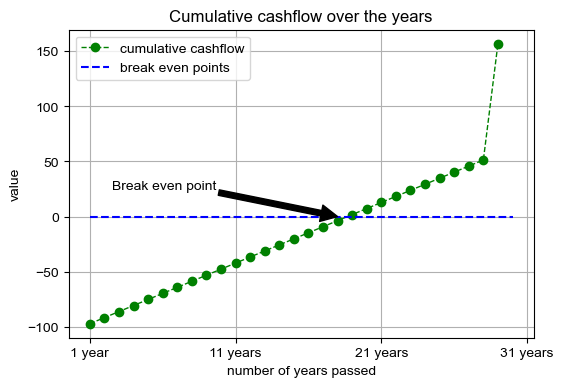

In [5]:
import matplotlib.pyplot as plt

cf = [5.5]*27
cf.insert(0,-97.2)
cf.insert(len(cf),105.5)
# print(cf,len(cf))

guess = 0.055
target_npv = 0
tolerance = 0.01
j = 0
NPV_M = 0
while True:
    NPV = 0
    for i in range(len(cf)):
        NPV += cf[i] / (1+guess) ** i
    j += 1
    if j%2 == 0:
        if NPV_M == NPV:
            break
        else:
            NPV_M = NPV
    if j < 1000 and abs(NPV - target_npv) > tolerance:
        if NPV < target_npv:
            guess -= 0.00005
        elif NPV > target_npv:
            guess += 0.00005
    else:
        break
print("{} NPV for {} % IRR, obtained for {} iterations".format(round(NPV,2),round(100*guess,2),j))

cum_cf = []
s = 0
for i in cf:
    s += i
    cum_cf.append(s)

plt.figure(figsize=(6,4))    
plt.plot(range(1,30),cum_cf, color = "g", linewidth = 1, linestyle = "--", marker = "o", label="cumulative cashflow")
plt.grid()
plt.hlines(y=0, xmin = 1, xmax = 30, color = "blue", linestyle = "--", label="break even points")
plt.xlabel("number of years passed")
plt.ylabel("value")
plt.yticks(range(-100,155,50))
plt.xticks(range(1,33,10), labels = ["1 year", "11 years", "21 years", "31 years"])
plt.annotate("Break even point", xy = (18,0), xytext = (2.5,25), arrowprops = {"color":"black"}, fontsize = 10)
plt.title("Cumulative cashflow over the years")
plt.legend(loc = "best",fontsize = 10)
plt.style.use('seaborn-v0_8')
plt.show()
# plt.savefig("my_figure.png", dpi=300)  # Save with 300 DPI

In [25]:
# pip install numpy-financial
import numpy_financial as npf
import numpy as np

# Exersise 1 type problem
cf = np.array([-200, 20, 50, 70, 100, 50])
r = 0.06
print('NPV of such cf for r {} % is {} USD, while IRR {} %'.format(round(100*r, 1), round(npf.npv(r, cf),0), round(100*npf.irr(cf), 1)))

NPV of such cf for r 6.0 % is 39.0 USD, while IRR 11.9 %


In [23]:
cf = [5.5]*27
cf.insert(0,-97.2)
cf.insert(len(cf),105.5)
cf = np.array(cf)
print("YTM of a bond with such cf is {} %".format(round(100*npf.irr(cf),3)))

YTM of a bond with such cf is 5.703 %


### Exercise 3

#### Annuities & Retirement Planning

You plan to save \$2,000 per year for the next 25 years. The account earns an annual interest rate of 3%.

What is the total future value (FV) of your savings at the end of 25 years?

In [60]:
N = 25
PV = 10000 # conditional PV
cf = np.zeros((1,N))+2000
year = np.arange(N-1, -1, -1)
r = 0.03
fv = PV*(1+r)**N + (cf * ((1+r) ** year)).sum()
fva = npf.fv(rate = r, nper = N, pmt = 2000, pv = PV)
print("Future value in a Bank is {} USD or {} USD".format(round(fv,2),round(-fva,2)))

Future value in a Bank is 93856.31 USD or 93856.31 USD


#### Payout plan

At the retirement, you have Annuity Contract worth 100,000.00 USD. Assume you get payouts 5,000 USD p.a. and a fixed interest rate of 3% p.a. What is the remaining future value FV of your contract after 25 years.

In [69]:
N = 25
PV = 100000
cf = np.zeros((1,N))+5000
year = np.arange(N-1, -1, -1)
r = 0.03
fv = PV*(1+r)**N - (cf * ((1+r) ** year)).sum()
print("In 25 years you still own {} USD, that will be payed to you".format(round(fv,2)))

In 25 years you still own 27081.47 USD, that will be payed to you


How much can I squeeze out of the savings account?

In [82]:
cf_guess = 5100
i = 0
while True:
    i += 1
    cf = np.zeros((1,N))+cf_guess
    fv = PV*(1+r)**N - (cf * ((1+r) ** year)).sum()
    if fv > 0:
        cf_guess += 10
    elif fv<0 or i>100:
        cf_guess -= 10
        cf = np.zeros((1,N))+cf_guess
        fv = PV*(1+r)**N - (cf * ((1+r) ** year)).sum()
        break
print("Around {} USD per month, with FV {} USD".format(round(cf_guess,1), round(fv,2)))

Around 5740 USD per month, with FV 101.62 USD


How much do we need to pay yearly, starting now, to our Bank account now to have 100,000.00 USD in 25 years

In [98]:
N = 25
PV = 0
FV_target = 100000
year = np.arange(N-1, -1, -1)
r = 0.03
cf_guess = 2000
while True:
    cf = np.zeros((1,N))+cf_guess
    fv = (cf * ((1+r) ** year)).sum()
    if fv < FV_target:
        cf_guess += 10
    else:
        cf_guess -= 10
        cf = np.zeros((1,N))+cf_guess
        fv = (cf * ((1+r) ** year)).sum()
        break
print("By paying {} USD yearly, in 25 years will have {} USD".format(round(cf_guess,2),round(fv,2)))
print("Using npf its {} USD, with FV {} USD". format(round(npf.pmt(rate = r, nper = N, pv = 0, fv = FV_target),2),round(npf.fv(rate = r, nper = N, pmt = -2742.79, pv = 0),2)))

By paying 2740 USD yearly, in 25 years will have 99898.38 USD
Using npf its -2742.79 USD, with FV 100000.11 USD


How many payments I have to make with 2500 to achive 100000 retirement savings?

In [106]:
print("We need to serve for {} years".format(np.ceil(npf.nper(rate=r, pmt=-2500, pv=0, fv=100000))))

We need to serve for 27.0 years


### Exercise 4: Retirement Planning

Assume a 30-year-old investor who plans to retire at age 65, which is 35 years from now. During the **Funding Phase**, the investor expects to earn a **fixed annual return of 4%** on their monthly contributions. Upon retirement, during the **Payout Phase**, the investments will earn a **fixed monthly compounded interest of 3% annually**.

The investor wants to:
- Make **equal monthly deposits at the end of each month** for the next 35 years.
- Be able to **withdraw \$2,500 per month**, starting **at the beginning of each month**, for **25 years** (from age 65 to 90).
- Leave a **final balance of \$100,000** at age 90 to cover possible additional years and leave something for their children.

**Question:**  
How much must the investor deposit each month during the 35-year Funding Phase to meet these goals?

---

### Additional Context

- Average life expectancy in Germany:  
  - **Mean**: 80 years  
  - **Standard deviation**: 12 years

Use this to explore how longevity risk may affect the adequacy of the retirement plan.


In [163]:
m = 12
pmt_rtrm = 2500
N_work = 35
r_work = 0.04
N_rtrm = 25
r_rtrm_mean = 0.03
r_rtrm_std = 0.01
FV_final = 100000
n_sim = 300000

r_rtrm = np.random.normal(loc=r_rtrm_mean, scale=r_rtrm_std, size=n_sim)
pass_away_date = np.random.normal(loc=80, scale=12, size=1000)

PV_at_rtrm = npf.pv(rate=r_rtrm/m, nper=m*N_rtrm, pmt=pmt_rtrm, fv=FV_final, when="begin")

# monthly deposits required to reach mean PV at retirement
m_deposit = npf.pmt(rate=r_work/m, nper=m*N_work, pv=0, fv=-np.mean(PV_at_rtrm), when="end")
print("Monthly deposit has to be {:.2f} USD".format(-m_deposit))

savings = []
age = []

for i in range(np.size(pass_away_date)):
    date = pass_away_date[i]
    if 30 < date < 65:  # died before retirement
        worked_years = date - 30
        fv = npf.fv(rate=r_work/m, pmt=m_deposit, nper=int(m * worked_years), pv=0)
        savings.append(fv)
        age.append(date)
    elif 65 <= date <= 90:  # retired then died
        retired_years = date - 65
        r_i = r_rtrm[i]
        pv_i = PV_at_rtrm[i]
        fv = npf.fv(rate=r_i/m, nper=int(m * retired_years), pmt=pmt_rtrm, pv=-pv_i, when="begin")
        savings.append(-fv/1000)
        age.append(date)

Monthly deposit has to be 636.82 USD


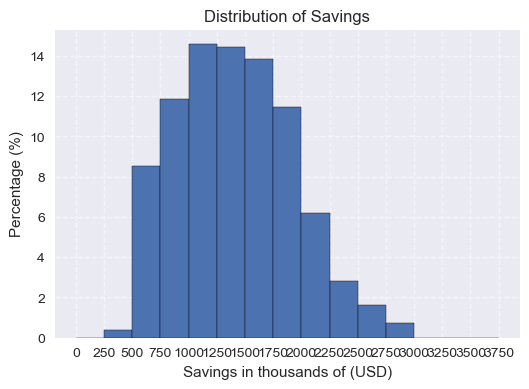

In [172]:
plt.figure(figsize=(6, 4))
bins = range(0, 4000, 250)

# Get histogram counts manually
counts, edges = np.histogram(savings, bins=bins)
percentages = 100 * counts / len(savings)

# Plot as percentages
plt.bar(edges[:-1], percentages, width=np.diff(edges), edgecolor='black', align='edge')

plt.xlabel('Savings in thousands of (USD)')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Savings')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(bins)
plt.show()

### Exercise 5: Amortizing Mortgage

You are considering taking out a mortgage with the following terms:

#### Mortgage Conditions:
1. The **initial loan** must not exceed **75% of the property's purchase price**.
2. The loan carries a **fixed nominal interest rate of 5% per annum**, **compounded monthly**.
3. The loan term is **30 years** (360 months), with **monthly payments**.
4. After 30 years, the **remaining balance (outstanding loan)** must not exceed **\$100,000**.
5. The **monthly mortgage payment** must not exceed **one-third of your available monthly income**, which is **\$4,800**.

---

### Questions:
1. **What is the effective annual interest rate (EAR)?**  
   Use monthly compounding to compute the EAR.

2. **What is the maximum allowable initial loan amount**, given all constraints above?

3. **Amortization Schedule:**
   - Compute and plot the **monthly breakdown** of:
     - Interest component
     - Amortization (principal repayment) component
     - Outstanding loan balance
   - Visualize how these components evolve over the 30-year term.

---

You may also want to:
- Calculate the **total interest paid over the life of the loan**.
- Compare loan dynamics under slightly different interest rates or payment strategies.


The initial loan amount possible is 300000.0 USD!
The balanse after 30 years is -8709.477623486891 USD
Amortization for month one is -350.0000000000002 USD
Interest for month one is -1250.0 USD


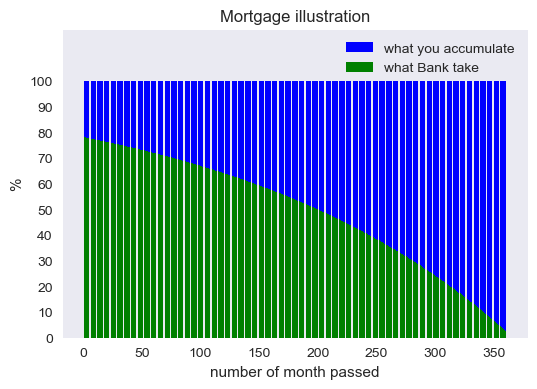

In [195]:
m = 12
pp = 400000
max_LTV = 0.75 
r = 0.05
available_income = 4800
DSCR = 3/1
cf = -available_income / DSCR
n = 30
FV = -100000
r_eff = (1 + r/m)**m - 1
PV = npf.pv(rate = r/m, nper = n*m, pmt = cf, fv = FV)
loan = min(PV,pp*max_LTV)
print("The initial loan amount possible is {} USD!".format(loan))
final_balance = npf.fv(rate = r/m, nper = n*m, pmt = cf, pv = loan)
print("The balanse after 30 years is {} USD".format(final_balance))
amort = npf.ppmt(rate = r/m, per = 1, nper = n*m, pv = loan, fv = final_balance)
print("Amortization for month one is {} USD".format(amort))
portion_of_interest = npf.ipmt(rate = r/m, per = 1, nper = n*m, pv = loan, fv = final_balance)
print("Interest for month one is {} USD".format(portion_of_interest))
interest_persentage = 100*npf.ipmt(rate = r/m, per = range(1,1+n*m), nper = n*m, pv = loan, fv = final_balance)/cf

plt.figure(figsize=(6,4))    
plt.bar(range(1,1+n*m),100-0*interest_persentage, color = "b", linewidth = 1, linestyle = "-", width=0.8, label="what you accumulate")
plt.bar(range(1,1+n*m),interest_persentage, color = "g", linewidth = 1, linestyle = "-", width=0.8, label="what Bank take")

plt.grid()
plt.xlabel("number of month passed")
plt.ylabel("%")
plt.yticks(range(0,110,10))
plt.ylim([0, 120])
#plt.xticks(range(1,1+n*m,12), labels = ["1 year", "2 years", "3 years", "4 years"])
plt.title("Mortgage illustration")
plt.legend(loc = "best",fontsize = 10)
plt.style.use('seaborn-v0_8')
plt.show()

### Exercise 6: Valuation of Bonds

You are considering purchasing a **corporate bond** issued by XYZ Company with the following terms:

- **Coupon rate**: 5% per annum, paid **quarterly in arrears**
- **Term**: 6 years (24 quarters)
- **Face value**: \$100
- **Final repayment** of principal occurs at **maturity (in 6 years)**

**Market condition:**  
Bonds of **comparable credit risk and maturity** are currently yielding **4.5% per annum**.

---

### Question:
What is the **fair price** you would be willing to pay **per \$100 face value** for the XYZ bond?

> Use the **quarterly-compounded Yield to Maturity (YTM)** of 4.5% p.a. to discount future cash flows.


In [198]:
m = 4 # quaterly
coup = 5 / m # per par
r = 0.045
n = 6
FV = 100
PV = npf.pv(rate = r/m, nper = n*m, pmt = coup, fv = FV)
print('No more then {} USD'.format(round(-PV,2)))

No more then 102.62 USD


### Exercise 7: S&P 500 Returns Analysis (2018)

You are given a dataset containing **S&P 500 daily returns for the year 2018**. While one might expect around 252 trading days in a year, this dataset contains **500 data points**, possibly due to inclusion of intraday returns or extended data. Regardless, we can proceed with a standard return analysis.

---

### Objectives:

1. **Explore the distribution of returns**:
   - Plot a **histogram** of the returns.
   - Compute and plot the **cumulative distribution function (CDF)**.

2. **Estimate Value at Risk (VaR)** using multiple methods:
   - **Historical simulation**
   - **Parametric normal approximation**
   - **Cornish-Fisher expansion** (accounts for skewness and kurtosis)
   - **GARCH(1,1) model-based estimation**

3. **Validate the Central Limit Theorem (CLT)**:
   - Randomly sample subsets of returns.
   - Compute the **sample means** and **confidence intervals**.
   - Visualize the distribution of sample means to show convergence toward normality as predicted by the CLT.

---

This exercise combines both **risk estimation** and **statistical inference**, offering insight into how different models can produce varying estimates of risk, and how sampling theory underpins many assumptions in financial analytics.


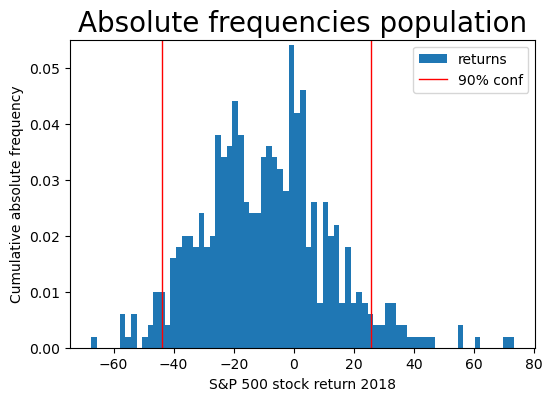

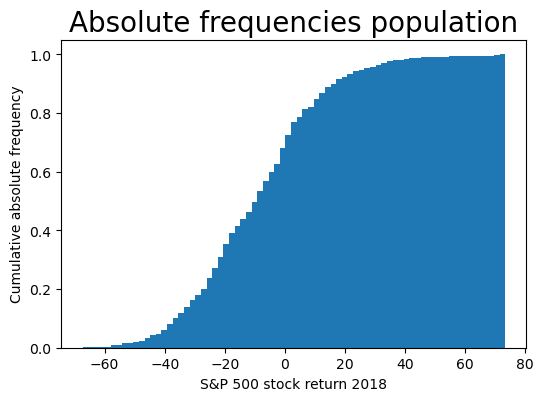

Skew is 0.41505283064889487
Kurtosis is 0.661870083769164 
Year VaR 5% is -43.73


In [2]:
import numpy_financial as npf
import numpy as np
np.set_printoptions(precision = 2, suppress = True)
import matplotlib.pyplot as plt
import scipy.stats as stats

pop = np.loadtxt("SP500_2018.csv", delimiter = ",", usecols = 1) # loading returns
sample = np.loadtxt("sample_2018.csv", delimiter = ",", usecols = 1) # loading returns
pop = pop
sample = sample

# np.isin(sample, pop)
plt.figure(figsize=(6,4))   
plt.hist(pop, bins = 75, weights = np.ones(len(pop))/len(pop), label = 'returns')

conf = 0.9
tail = (1-conf)/2
left = stats.norm.ppf(loc = pop.mean(), scale = pop.std(), q = tail)
right = stats.norm.ppf(loc = pop.mean(), scale = pop.std(), q = 1-tail)
plt.plot([left, left], [0, 0.055], color='red', linewidth=1, label = '90% conf')  # vertical line 
plt.plot([right, right], [0, 0.055], color='red', linewidth=1)  # vertical line 
plt.ylim([0, 0.055])
plt.title("Absolute frequencies population", fontsize = 20)
plt.xlabel("S&P 500 stock return 2018")
plt.ylabel("Cumulative absolute frequency")
plt.legend(loc = "best",fontsize = 10)
plt.show()

plt.figure(figsize=(6,4))   
plt.hist(pop, bins = 75, weights = np.ones(len(pop))/len(pop), cumulative = True)
plt.title("Absolute frequencies population", fontsize = 20)
plt.xlabel("S&P 500 stock return 2018")
plt.ylabel("Cumulative absolute frequency")
plt.show()

print("Skew is {}".format(stats.skew(100*pop)))
print("Kurtosis is {} ".format(stats.kurtosis(100*pop, fisher = True)))
print("Year VaR 5% is {:.2f}".format(stats.norm.ppf(loc = pop.mean(), scale = pop.std(), q = 0.05)))

In [69]:
import numpy as np
from scipy.stats import norm, skew, kurtosis
from arch import arch_model

def VaR(ret, alpha=0.05, method='historical', **kwargs):
    """
    Compute Value at Risk (VaR) at given confidence level using specified method.

    Parameters:
        ret (array-like): Array of portfolio returns.
        signif (float): Ssignificance level (e.g., 0.05 for 5%).
        method (str): Method to compute VaR. Options:
            - 'historical': Historical simulation
            - 'norm': Parametric normal VaR (requires 'mean' and 'std')
            - 'cornish-fisher': Adjusted normal VaR using skew/kurtosis
        kwargs: Additional arguments required for some methods:
            - norm: 'mean' and 'std'
    
    Returns:
        VaR (float): Value at Risk estimate (positive number).
    """
    ret = np.asarray(ret)

    if method == 'historical':
        # Historical quantile (non-parametric)
        var = np.quantile(ret, alpha)

    elif method == 'norm':
        mu = kwargs.get('mean', np.mean(ret))
        sigma = kwargs.get('std', np.std(ret, ddof=1))
        var = stats.norm.ppf(loc = mu, scale = sigma, q = alpha)

    elif method == 'cornish-fisher':
        # Adjust z-score using Cornish-Fisher expansion
        mu = np.mean(ret)
        sigma = np.std(ret, ddof=1)
        s = skew(ret)
        k = kurtosis(ret, fisher=True)  # excess kurtosis

        z = norm.ppf(alpha)
        z_cf = (z
                + (1/6)*(z**2 - 1)*s
                + (1/24)*(z**3 - 3*z)*k
                - (1/36)*(2*z**3 - 5*z)*s**2)
        var = (mu + z_cf * sigma)
    elif method == 'garch':
        """
        VaR estimation using GARCH(1,1) model.
    
        Parameters:
        ret (array-like): Return series (must be mean-zero or de-meaned).
        conf (float): Confidence level for VaR (e.g. 0.99).
        horizon (int): Forecast horizon (e.g., 1 for one-day ahead).
        
        Returns:
            float: VaR estimate.
        """
        horizon = kwargs.get('horizon')
        p = kwargs.get('p')
        q = kwargs.get('q')
        ret = np.asarray(ret) * 100  # scale to percent if needed
        model = arch_model(ret, vol='Garch', p=p, q=q, dist='normal', rescale=False)
        res = model.fit(disp="off")
    
        # Forecast variance at next step
        forecast = res.forecast(horizon=horizon)
        sigma_forecast = np.sqrt(forecast.variance.values[-1, -1])  # one-step ahead std

        mu = res.params.get('mu', 0)
        z = norm.ppf(alpha)

        var = (mu + z * sigma_forecast) / 100 # original scale

    else:
        raise ValueError(f"Unknown method: {method}")

    return var

def expected_shortfall(ret, VaR_value):
    """
    Compute Expected Shortfall (ES) from return array and VaR.

    Parameters:
        ret (array-like): Array of returns.
        VaR_value (float): Value at Risk (positive number, e.g., 0.02 for 2%).

    Returns:
        float: Expected Shortfall (positive number).
    """
    ret = np.asarray(ret)
    losses = -ret  # convert gains/losses to losses

    # Average of losses worse than VaR
    es = losses[losses > VaR_value].mean()
    return es

print("VaR (historical):", VaR(pop, sign=0.05, method='historical'))
print("VaR (normal):", VaR(pop, sign=0.05, method='norm', mean=pop.mean(), std=pop.std()))
print("VaR (Cornish-Fisher):", VaR(pop, sign=0.05, method='cornish-fisher'))
print("VaR (Garch[1,1]):", VaR(pop, sign=0.05, method='garch', p=1, q=1, horizon=1))
print("VaR (Garch[1,2]):", VaR(pop, sign=0.05, method='garch', p=1, q=2, horizon=1))
print("VaR (Garch[2,1]):", VaR(pop, sign=0.05, method='garch', p=2, q=1, horizon=1))
print("VaR (Garch[2,2]):", VaR(pop, sign=0.05, method='garch', p=2, q=2, horizon=1))
print("VaR (Garch[10,10]):", VaR(pop, sign=0.05, method='garch', p=10, q=10, horizon=1))

VaR (historical): -40.9614943861375
VaR (normal): -43.72895212130868
VaR (Cornish-Fisher): -40.91861399390955
VaR (Garch[1,1]): -43.257904734671165
VaR (Garch[1,2]): -42.95723830876039
VaR (Garch[2,1]): -43.257917096439044
VaR (Garch[2,2]): -42.95199225766541
VaR (Garch[10,10]): -44.85334091189992


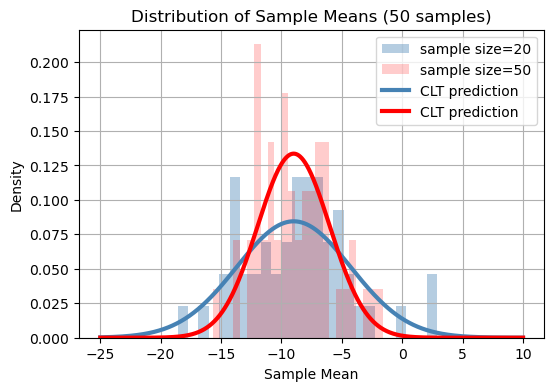

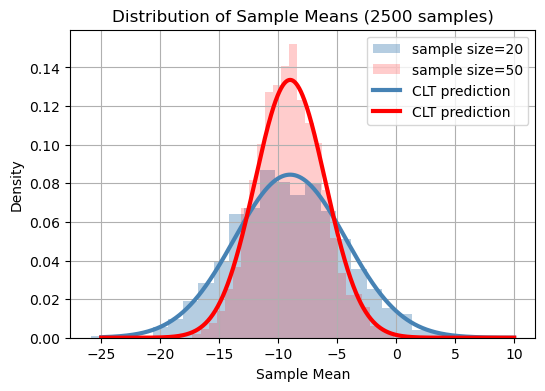

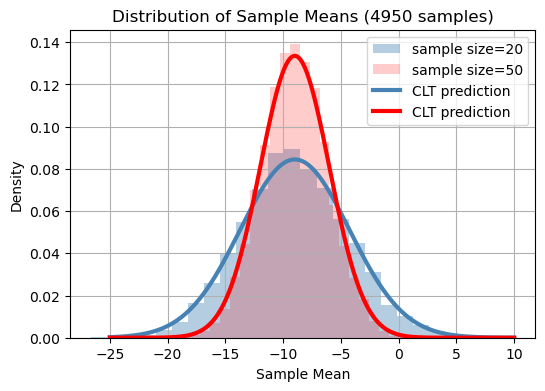

Mean of the full population is -8.98877724334972
Std of the full population is 21.120526658864755
Standart error of the Red approaches 2.989884905888059
Standart error of the Blue approaches 4.727423122182223
Mean of the Blue approaches -8.967436692099854 with 95% confidence interval (-18.233015751258907,0.2981423670591994)
Mean of the Red approaches -8.987465406324473 with 95% confidence interval (-14.847532139784999,-3.127398672863948)


In [4]:
# --- Parameters ---
#full_pop = np.random.exponential(scale=1.0, size=10000)  # non-normal population
full_pop = pop
x = np.linspace(-25,10,1000)
y_b = stats.norm.pdf(x, loc = np.mean(pop), scale = np.std(pop)/np.sqrt(20))
y_r = stats.norm.pdf(x, loc = np.mean(pop), scale = np.std(pop)/np.sqrt(50))

for j in range(1,100,49):
    number_of_samples = 50*j  # increase for better CLT visualization
    
    sample_size = 20
    samples_mean_20 = []

    # --- Sampling loop ---
    for i in range(number_of_samples):
        sample = np.random.choice(full_pop, sample_size, replace=False)
        samples_mean_20.append(np.mean(sample))
        
    sample_size = 50
    samples_mean_50 = []

    # --- Sampling loop ---
    for i in range(number_of_samples):
        sample = np.random.choice(full_pop, sample_size, replace=False)
        samples_mean_50.append(np.mean(sample))

    # --- Plotting the result ---
    plt.figure(figsize=(6,4)) 

    # Histogram of sample means
    plt.hist(samples_mean_20, bins=25, density=True, alpha=0.4, color='steelblue', label = "sample size=20")
    plt.hist(samples_mean_50, bins=25, density=True, alpha=0.2, color='red', label = "sample size=50")
    plt.plot(x, y_b, color='steelblue', linewidth = 3, label = "CLT prediction")
    plt.plot(x, y_r, color='red', linewidth = 3, label = "CLT prediction")
    plt.legend()
    plt.title(f'Distribution of Sample Means ({number_of_samples} samples)')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()
print("Mean of the full population is {}".format(np.mean(pop)))
print("Std of the full population is {}".format(np.std(pop)))
print("Standart error of the Red approaches {}".format(np.std(pop, ddof=1)/np.sqrt(50)))
print("Standart error of the Blue approaches {}".format(np.std(pop, ddof=1)/np.sqrt(20)))

left_z, right_z = stats.norm.interval(0.95)
conf_int_50 = (np.mean(samples_mean_50) + left_z*np.std(pop, ddof=1)/np.sqrt(50), np.mean(samples_mean_50) + right_z*np.std(pop, ddof=1)/np.sqrt(50))
conf_int_20 = (np.mean(samples_mean_20) + left_z*np.std(pop, ddof=1)/np.sqrt(20), np.mean(samples_mean_20) + right_z*np.std(pop, ddof=1)/np.sqrt(20))
print("Mean of the Blue approaches {} with 95% confidence interval ({},{})".format(np.mean(samples_mean_20), conf_int_20[0], conf_int_20[1]))
print("Mean of the Red approaches {} with 95% confidence interval ({},{})".format(np.mean(samples_mean_50), conf_int_50[0], conf_int_50[1]))
# Alternatively use the bootstrap as
# bootstrap.append(np,random.choice(sample, size, replace = True).mean())
# np.percentile(bootstrap, [2.5, 97.5])

In [84]:
conf_int_20[0]

-18.267961464964966